# Load the data

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,id,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,...,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
0,77130752.0,13011,18.0,4177.0,0,3664,11,2016,10,14,...,420.0,76.0,85.0,91.0,104.0,120.0,366.0,73.0,1050.0,1050.0
1,77126682.0,13011,28.0,6054.0,1,3244,10,2015,8,21,...,158.0,98.0,104.5,109.0,119.0,139.0,360.0,73.0,1050.0,1050.0
2,9816130.0,13011,8.0,1753.0,0,3086,9,2015,3,16,...,1050.0,102.0,111.0,117.0,126.0,140.5,386.0,73.0,1050.0,1050.0
3,1641895.0,13011,12.0,3194.0,0,2036,8,2012,4,30,...,73.0,137.0,146.0,145.0,161.0,157.0,291.0,73.0,682.0,682.0
4,1523930.0,13011,4.0,922.0,0,1963,7,2012,2,17,...,338.0,137.0,149.0,147.0,161.0,159.0,327.0,136.0,682.0,682.0


In [3]:
df.shape

(27755, 31)

In [4]:
# only singles
# df = df[df['record_type_single'] == 1]

# only albums
df = df[df['record_type_album'] == 1]

In [5]:
df = df.sort_values(['release_year', 'release_month', 'release_day_of_month'])
df.head()

,id,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,...,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_2_years,average_days_to_release_in_last_3_years,average_days_to_release_in_last_5_years,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
815,7726073.0,2419,9.0,1932.0,0,1000,6,2012,1,1,...,10.0,140.0,153.0,151.0,161.0,158.0,200.0,10.0,908.0,908.0
1072,1575391.0,171,10.0,2556.0,0,4296,10,2012,1,1,...,124.0,140.0,153.0,151.0,161.0,158.0,477.0,124.0,790.0,790.0
2633,8166310.0,13188,14.0,2019.0,0,12346,29,2012,1,1,...,100.0,140.0,153.0,151.0,161.0,158.0,441.0,28.0,581.0,581.0
2634,8166260.0,13188,15.0,2207.0,0,12346,29,2012,1,1,...,100.0,140.0,153.0,151.0,161.0,158.0,441.0,28.0,581.0,581.0
4699,15484954.0,4742,37.0,8875.0,0,14671,41,2012,1,1,...,166.0,140.0,153.0,151.0,161.0,158.0,367.0,16.0,892.0,892.0


In [6]:
df = df.drop([
    u'average_days_to_release_in_last_2_years',
    u'average_days_to_release_in_last_3_years',
    u'average_days_to_release_in_last_5_years',
#     u'average_days_to_release_in_last_2_years_for_release_type',
#     u'average_days_to_release_in_last_3_years_for_release_type',
#     u'average_days_to_release_in_last_5_years_for_release_type',
], axis=1)

In [7]:
df[df['release_year'] >= 2017].shape

(4245, 28)

In [8]:
df = df[df['release_year'] >= 2017]

In [9]:
y = df['days_until_next_album']
X = df.drop(['days_until_next_album', 'id'], axis=1)
y.shape, X.shape

((4245,), (4245, 26))

In [10]:
X.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
4350,1447,9.0,3549.0,0,5055,21,2017,1,1,6,...,0,0,0,646.0,69.0,112.0,253.0,4.0,970.0,970.0
4351,1447,13.0,2947.0,0,5055,21,2017,1,1,6,...,0,0,0,646.0,69.0,112.0,253.0,4.0,970.0,970.0
4352,1447,12.0,3153.0,0,5055,21,2017,1,1,6,...,0,0,0,646.0,69.0,112.0,253.0,4.0,970.0,970.0
9871,1887,4.0,774.0,0,19359,33,2017,1,1,6,...,0,0,0,2.0,69.0,112.0,605.0,1.0,3644.0,3644.0
15087,915,5.0,1073.0,1,5899,38,2017,1,1,6,...,0,0,0,15.0,69.0,112.0,159.0,4.0,756.0,756.0


In [11]:
columns = X.columns
columns

Index([u'artist_id', u'nb_tracks', u'duration', u'explicit_lyrics',
       u'days_since_first_release', u'total_albums_released', u'release_year',
       u'release_month', u'release_day_of_month', u'release_day_of_week',
       u'record_type_album', u'record_type_single', u'record_type_ep',
       u'albums_released_in_30_days', u'albums_released_in_30_60_days',
       u'albums_released_in_60_90_days', u'albums_released_in_90_180_days',
       u'albums_released_in_180_360_days', u'albums_released_in_360_720_days',
       u'days_since_previous_release', u'average_days_to_release_in_last_year',
       u'average_days_to_release_in_last_year_for_release_type',
       u'average_days_to_release', u'min_release_frequency',
       u'max_release_frequency',
       u'average_release_frequency_for_release_type'],
      dtype='object')

In [12]:
y.head()

4350     124.0
4351     124.0
4352     124.0
9871      23.0
15087     82.0
Name: days_until_next_album, dtype: float64

# Train/Test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3820, 26), (425, 26), (3820,), (425,))

In [15]:
# X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=False)
# X_cv.shape, X_test.shape, y_cv.shape, y_test.shape

In [16]:
X_train.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
4350,1447,9.0,3549.0,0,5055,21,2017,1,1,6,...,0,0,0,646.0,69.0,112.0,253.0,4.0,970.0,970.0
4351,1447,13.0,2947.0,0,5055,21,2017,1,1,6,...,0,0,0,646.0,69.0,112.0,253.0,4.0,970.0,970.0
4352,1447,12.0,3153.0,0,5055,21,2017,1,1,6,...,0,0,0,646.0,69.0,112.0,253.0,4.0,970.0,970.0
9871,1887,4.0,774.0,0,19359,33,2017,1,1,6,...,0,0,0,2.0,69.0,112.0,605.0,1.0,3644.0,3644.0
15087,915,5.0,1073.0,1,5899,38,2017,1,1,6,...,0,0,0,15.0,69.0,112.0,159.0,4.0,756.0,756.0


In [17]:
# X_cv.head()

In [18]:
X_test.head()

,artist_id,nb_tracks,duration,explicit_lyrics,days_since_first_release,total_albums_released,release_year,release_month,release_day_of_month,release_day_of_week,...,albums_released_in_90_180_days,albums_released_in_180_360_days,albums_released_in_360_720_days,days_since_previous_release,average_days_to_release_in_last_year,average_days_to_release_in_last_year_for_release_type,average_days_to_release,min_release_frequency,max_release_frequency,average_release_frequency_for_release_type
13339,2529,16.0,4018.0,1,5841,22,2019,2,22,4,...,0,0,0,92.0,34.0,49.0,278.0,2.0,1660.0,1660.0
13340,2529,12.0,3241.0,1,5841,22,2019,2,22,4,...,0,0,0,92.0,34.0,49.0,278.0,2.0,1660.0,1660.0
14632,828,10.0,3651.0,0,17949,37,2019,2,22,4,...,0,0,0,14.0,34.0,49.0,499.0,4.0,712.0,712.0
15217,13461,10.0,2227.0,1,12338,49,2019,2,22,4,...,0,0,0,18.0,34.0,49.0,257.0,1.0,1185.0,1185.0
17943,3051,6.0,1343.0,0,5813,11,2019,2,22,4,...,0,0,0,21.0,34.0,49.0,581.0,21.0,1036.0,1036.0


# Baseline (Dummy Regressor)

In [19]:
from sklearn.dummy import DummyRegressor

In [20]:
model = DummyRegressor(strategy='median')
model.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [21]:
model.score(X_train, y_train)

-0.16001441652774573

In [22]:
model.score(X_test, y_test)

-9.284475941157122

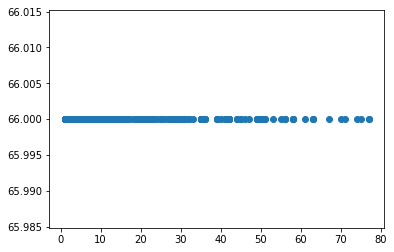

In [23]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)

In [24]:
mean_absolute_error(y_test, y_test_pred)

50.63529411764706

In [25]:
model = DummyRegressor(strategy='mean')
model.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [26]:
model.score(X_train, y_train)

0.0

In [27]:
model.score(X_test, y_test)

-44.917734216073185

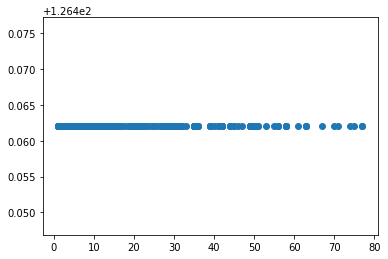

In [28]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)

In [29]:
mean_absolute_error(y_test, y_test_pred)

110.86674776716967

# Feature scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
X_train = scaler.transform(X_train)
# X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
X_train.shape

(3820, 26)

# PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(
    n_components=0.99,
    svd_solver='full',
    random_state=1000
)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=1000,
  svd_solver='full', tol=0.0, whiten=False)

In [36]:
# X_train = pca.transform(X_train)
# # X_cv = pca.transform(X_cv)
# X_test = pca.transform(X_test)

In [37]:
X_train.shape

(3820, 26)

# Feature selection

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [39]:
estimator = RandomForestRegressor(random_state=1000, n_jobs=-1)
selector = RFE(estimator, 10, step=1)
selector = selector.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [40]:
selector.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True,  True, False])

In [41]:
# X_train = selector.transform(X_train)
# # X_cv = selector.transform(X_cv)
# X_test = selector.transform(X_test)

In [42]:
X_train.shape

(3820, 26)

# Linear regression

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
linear_model = LinearRegression(
    n_jobs=-1
)
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [170]:
linear_model.score(X_train, y_train)

0.1619359098917169

In [171]:
linear_model.score(X_test, y_test)

-3.936427171764982

In [177]:
for i, x in enumerate(linear_model.coef_):
    if x > 5 or x < -5:
        print(columns[i], float(x))

('days_since_first_release', 11.36624390333956)
('total_albums_released', -29.73175031296589)
('release_year', -28.982548438879405)
('release_month', -9.861151685637942)
('release_day_of_week', 15.533096017660647)
('days_since_previous_release', 15.77838139323399)
('average_days_to_release_in_last_year', 15.58443796718891)


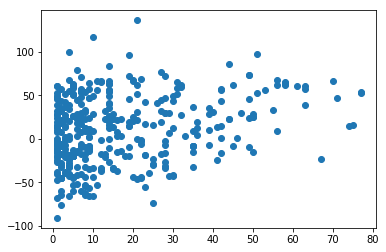

In [178]:
linear_y_test_pred = linear_model.predict(X_test)
plt.scatter(y_test, linear_y_test_pred)

In [179]:
mean_absolute_error(y_test, linear_y_test_pred)

30.084324920997457

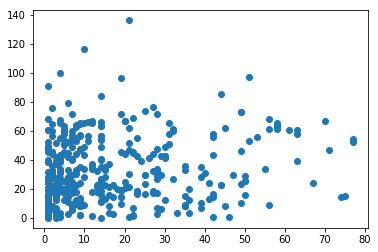

In [180]:
plt.scatter(y_test, np.abs(linear_y_test_pred))

In [181]:
mean_absolute_error(y_test, np.abs(linear_y_test_pred))

22.849449860112397

# KNN regression

In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [242]:
n_neighbors = [1, 2, 3, 4, 5, 10, 15, 25, 50, 100]
param_grid = {
    'n_neighbors': n_neighbors,
    'p': [1, 2],
}

cv = TimeSeriesSplit(n_splits=3)
cv = TimeSeriesSplit(n_splits=5).split(X_train)

hyperparameters_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
hyperparameters_search.best_params_

# model = KNeighborsRegressor(
#     n_jobs=-1
# )
# model.fit(X_train, y_train)

{'n_neighbors': 100, 'p': 1}

In [243]:
hyperparameters_search.best_score_

-0.17343898971962277

In [244]:
model = hyperparameters_search.best_estimator_
model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=100, p=1,
          weights='uniform')

In [245]:
model.score(X_train, y_train)

0.2169858923753888

In [246]:
model.score(X_test, y_test)

-2.66701853949079

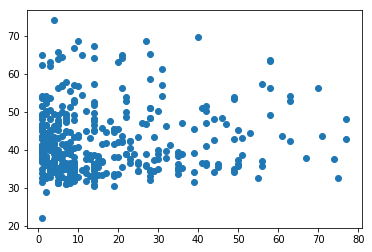

In [247]:
knn_y_test_pred = model.predict(X_test)
plt.scatter(y_test, knn_y_test_pred)

In [248]:
mean_absolute_error(y_test, knn_y_test_pred)

28.629694117647055

In [249]:
mean_absolute_error(y_test, np.abs(knn_y_test_pred))

28.629694117647055

# SVR

In [43]:
from sklearn.svm import SVR

In [44]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
#     'kernel': kernels,
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

GridSearchCV(cv=<generator object split at 0x110a9c410>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
hyperparameters_search.best_score_

-0.050524388954684064

In [46]:
model = hyperparameters_search.best_estimator_
model

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=5000, shrinking=True, tol=0.001, verbose=False)

In [47]:
model.score(X_train, y_train)

0.04735902635406275

In [52]:
mean_absolute_error(y_train, np.abs(model.predict(X_train)))

93.88964423851021

In [48]:
# model.score(X_cv, y_cv)

In [49]:
model.score(X_test, y_test)

-0.4490841214930126

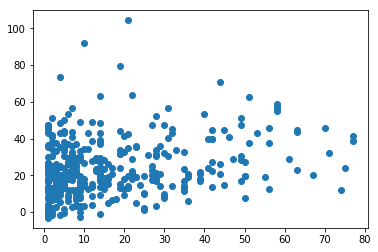

In [50]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [51]:
mean_absolute_error(y_test, svr_y_test_pred)

15.030642935329901

In [122]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

14.967600137859536

# SVR

In [182]:
from sklearn.svm import SVR

In [183]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=<generator object split at 0x114992050>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['poly'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1], 'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
hyperparameters_search.best_score_

-0.11934096906722685

In [185]:
model = hyperparameters_search.best_estimator_
model

SVR(C=0.001, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=0.001,
  kernel='poly', max_iter=1000, shrinking=True, tol=0.001, verbose=False)

In [186]:
model.score(X_train, y_train)

-0.07707381891052334

In [187]:
# model.score(X_cv, y_cv)

In [188]:
model.score(X_test, y_test)

-17.350535756392482

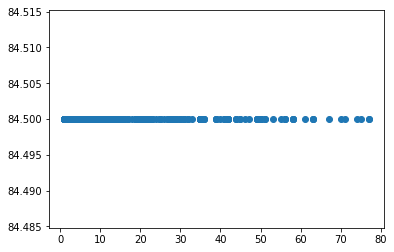

In [189]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [190]:
mean_absolute_error(y_test, svr_y_test_pred)

68.90469754038116

In [191]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

68.90469754038116

# SVR

In [192]:
from sklearn.svm import SVR

In [195]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
    'kernel': ['linear'],
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

GridSearchCV(cv=<generator object split at 0x1142527d0>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
hyperparameters_search.best_score_

-0.07162275649111495

In [197]:
model = hyperparameters_search.best_estimator_
model

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='linear', max_iter=5000, shrinking=True, tol=0.001, verbose=False)

In [198]:
linear_svc_model = model

In [199]:
for i, x in enumerate(linear_svc_model.coef_[0]):
    if x > 2 or x < -2:
        print(columns[i], x)

('total_albums_released', -4.934167818961722)
('release_year', -3.85150826833738)
('release_day_of_week', 2.76132557323769)
('days_since_previous_release', 3.909984647426672)
('average_days_to_release_in_last_year', 3.350135774819728)
('average_days_to_release_in_last_year_for_release_type', 3.6141824860301592)
('average_days_to_release', 2.619910206938125)


In [200]:
model.score(X_train, y_train)

-0.0700881866232268

In [201]:
# model.score(X_cv, y_cv)

In [202]:
model.score(X_test, y_test)

-1.7418191130186278

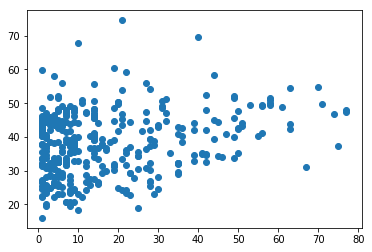

In [203]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [204]:
mean_absolute_error(y_test, svr_y_test_pred)

24.40613134765691

In [205]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

24.40613134765691

# SVR

In [206]:
from sklearn.svm import SVR

In [207]:
max_iters = [100, 1000, 5000, 10000, 20000, 50000, 100000]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {
    'max_iter': max_iters,
    'kernel': ['sigmoid'],
    'C': Cs,
    'gamma': gammas,
}

cv = TimeSeriesSplit(n_splits=3).split(X_train)
# my_cv = TimeSeriesSplit(n_splits=2)

hyperparameters_search = GridSearchCV(
    SVR(),
    param_grid,
    cv=cv,
    n_jobs=-1
)
hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

GridSearchCV(cv=<generator object split at 0x1139e1b40>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['sigmoid'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 1000, 5000, 10000, 20000, 50000, 100000], 'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [208]:
hyperparameters_search.best_score_

-0.0413111987641992

In [209]:
model = hyperparameters_search.best_estimator_
model

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='sigmoid', max_iter=1000, shrinking=True, tol=0.001,
  verbose=False)

In [210]:
model.score(X_train, y_train)

-0.03844417886757512

In [211]:
# model.score(X_cv, y_cv)

In [212]:
model.score(X_test, y_test)

-0.7834536855805296

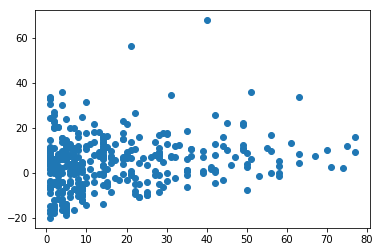

In [213]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, svr_y_test_pred)

In [214]:
mean_absolute_error(y_test, svr_y_test_pred)

17.103467986665578

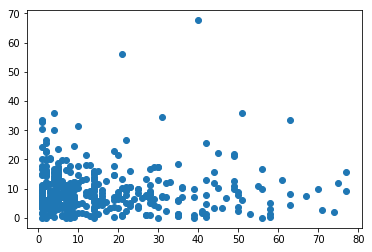

In [216]:
svr_y_test_pred = model.predict(X_test)
plt.scatter(y_test, np.abs(svr_y_test_pred))

In [215]:
mean_absolute_error(y_test, np.abs(svr_y_test_pred))

13.60803195736503

# Ensembling

In [71]:
# preds = [linear_y_cv_pred, knn_y_cv_pred, svr_y_cv_pred]

In [72]:
# average_preds = np.abs(linear_y_cv_pred + knn_y_cv_pred + svr_y_cv_pred / len(preds)) - 50

In [73]:
# mean_absolute_error(y_cv, average_preds)

# Random Forest model

In [74]:
# from sklearn.ensemble import RandomForestRegressor

In [75]:
# # model = RandomForestRegressor(
# #     n_estimators=100,
# #     max_depth=50,
# # #     max_features=5,
# # #     min_samples_leaf=1,
# # #     criterion='mse',
# #     random_state=0, n_jobs=-1
# # )
# # model.fit(X_train, y_train)

# n_estimators = [10, 20, 50, 100, 200]
# max_depth = [None, 1, 2, 3, 5, 7, 10, 15]
# max_features = [None, 1, 2, 3, 5, 7, 10, 15, 'auto']
# min_samples_leaf = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
# param_grid = {
#     'n_estimators': n_estimators,
#     'max_depth': max_depth,
#     'max_features': max_features,
#     'min_samples_leaf': min_samples_leaf,
# }

# cv = TimeSeriesSplit(n_splits=7)

# hyperparameters_search = RandomizedSearchCV(
#     RandomForestRegressor(random_state=0),
#     param_grid,
#     cv=cv,
#     n_jobs=-1
# )
# hyperparameters_search.fit(X_train, y_train)
# hyperparameters_search.best_params_

In [76]:
# hyperparameters_search.best_score_

In [77]:
# model = hyperparameters_search.best_estimator_
# model

In [78]:
# model.score(X_train, y_train)

In [79]:
# model.score(X_test, y_test)

In [80]:
# model.feature_importances_

In [81]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [82]:
# mean_absolute_error(y_test, y_test_pred)

In [83]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# SGDRegressor

In [84]:
# from sklearn.linear_model import SGDRegressor

In [85]:
# model = SGDRegressor(max_iter=1000, tol=1e-3)
# model.fit(X_train, y_train)

In [86]:
# model.score(X_train, y_train)

In [87]:
# model.score(X_test, y_test)

In [88]:
# model.predict(X_train)

In [89]:
# y_train[0]

In [90]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [91]:
# mean_absolute_error(y_test, y_test_pred)

In [92]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# XGBoost

In [93]:
# !pip install xgboost

In [94]:
# from xgboost import XGBRegressor

In [95]:
# model = XGBRegressor(
#     max_depth=2,
# #     subsample=0.9,
# #     colsample_bytree=0.9,
# #     colsample_bylevel=0.9,
# #     min_child_weight=1,
#     random_state=0, n_jobs=-1
# )
# model.fit(X_train, y_train)

In [96]:
# model.score(X_train, y_train)

In [97]:
# model.score(X_test, y_test)

In [98]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [99]:
# mean_absolute_error(y_test, y_test_pred)

In [100]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# Catboost

In [101]:
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [102]:
# from catboost import CatBoostRegressor

In [103]:
# model = CatBoostRegressor(
# #     iterations=700,
# #     learning_rate=0.02,
# #     depth=12,
# #     eval_metric='RMSE',
# #     random_seed = 23,
# #     bagging_temperature = 0.2,
# #     od_type='Iter',
# #     metric_period = 75,
# #     od_wait=100
# )

In [104]:
# model.fit(X_train, y_train,
# #              eval_set=(X_test,y_valid),
# #              cat_features=categorical_features_pos,
# #              use_best_model=True,
# #              verbose=True
#          )

In [105]:
# model.score(X_train, y_train)

In [106]:
# model.score(X_test, y_test)

In [107]:
# y_test_pred = model.predict(X_test)
# plt.scatter(y_test, y_test_pred)

In [108]:
# mean_absolute_error(y_test, y_test_pred)

In [109]:
# mean_absolute_error(y_test, np.abs(y_test_pred))

# MLPRegressor

In [110]:
from sklearn.neural_network import MLPRegressor

In [111]:
model = MLPRegressor(
    hidden_layer_sizes=(100,),
    max_iter=200,
    alpha=0.1,
    warm_start=True,
    random_state=0,
)
model.fit(X_train, y_train)

/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=True)

In [112]:
model.score(X_train, y_train)

0.2269213854280048

In [113]:
model.score(X_test, y_test)

-0.4608407472517957

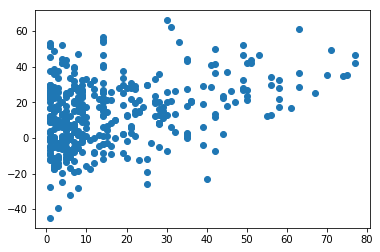

In [114]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred)

In [115]:
mean_absolute_error(y_test, y_test_pred)

15.838663351006405

In [116]:
mean_absolute_error(y_test, np.abs(y_test_pred))

13.72676402037675

# Keras

In [117]:
# !pip install keras